# Data description

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).


# Attribute Information

fLength: continuous # major axis of ellipse

fWidth: continuous # minor axis of ellipse [mm]

fSize: continuous # 10-log of sum of content of all pixels [in #phot]

fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]

fConc1: continuous # ratio of highest pixel over fSize [ratio]

fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]

fM3Long: continuous # 3rd root of third moment along major axis [mm]

fM3Trans: continuous # 3rd root of third moment along minor axis [mm]

fAlpha: continuous # angle of major axis with vector to origin [deg]

fDist: continuous # distance from origin to center of ellipse [mm]

class: g,h # gamma (signal), hadron (background)

# Importing and exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df2 = pd.read_csv("D:/SHRUTI/Practicals Softcopy/PROJECTS/MAGIC/telescope_data.csv")
df2.head()

fLen1t0    fWidt0   fSize   fConc  fConc1     fAsym  fM3Lon1  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlp0a     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [3]:
df2.shape

(19020, 11)

In [4]:
df2.columns

Index(['fLen1t0', 'fWidt0', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Lon1',
       'fM3Trans', 'fAlp0a', 'fDist', 'class'],
      dtype='object')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLen1t0   19020 non-null  float64
 1   fWidt0    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Lon1   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlp0a    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [6]:
df2.describe()

fLen1t0        fWidt0         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Lon1      fM3Trans        fAlp0a         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439     26.103621     74.731787   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250   
50%        4.013050     15.314100      0.666200     17.679500    191.851450   
75%       24.063700     35.837800     10.946425     45.883550    240.563825   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19020.000000  
mean       0.648370  
std        0.477492  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

# Detecting the Duplicates in the data and removing them

In [7]:
df2.duplicated().sum()

115

In [8]:
df2.drop_duplicates()

fLen1t0    fWidt0   fSize   fConc  fConc1     fAsym   fM3Lon1  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlp0a     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[18905 rows x 11 columns]

# To check the count of classes in target value.

In [11]:
df2['class'].value_counts()

1    12332
0     6688
Name: class, dtype: int64

Text(0.5, 1.0, 'Class')

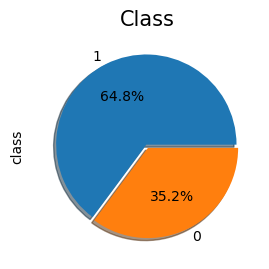

In [9]:
plt.subplot(1, 2, 2)
round(df2['class'].value_counts()/df2.shape[0]*100,2).plot.pie(autopct= '%1.1f%%', explode=[0.02,0.02],shadow=True)
plt.title('Class', fontsize=15)

<function matplotlib.pyplot.show(close=None, block=None)>

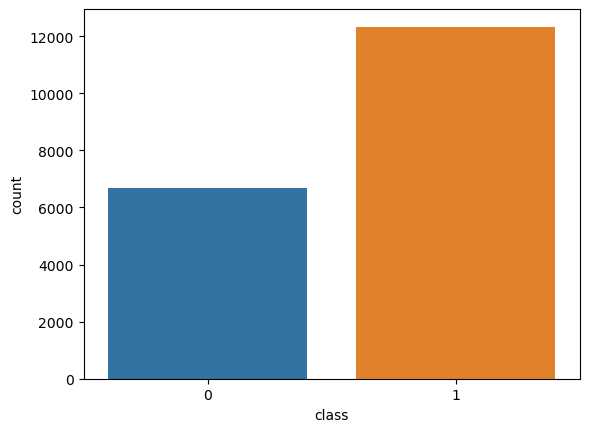

In [12]:
sns.countplot(df2["class"])
plt.show

# To check for null values in the data

In [10]:
df2.isnull().sum()

fLen1t0     0
fWidt0      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Lon1     0
fM3Trans    0
fAlp0a      0
fDist       0
class       0
dtype: int64

# Splitting the data into train and test data

In [13]:
X = df2[df2.columns[:-1]].values   #selecting the independent variables in the data
y = df2[df2.columns[-1]].values    #selecting the dependent variable in the data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Data Visualizations

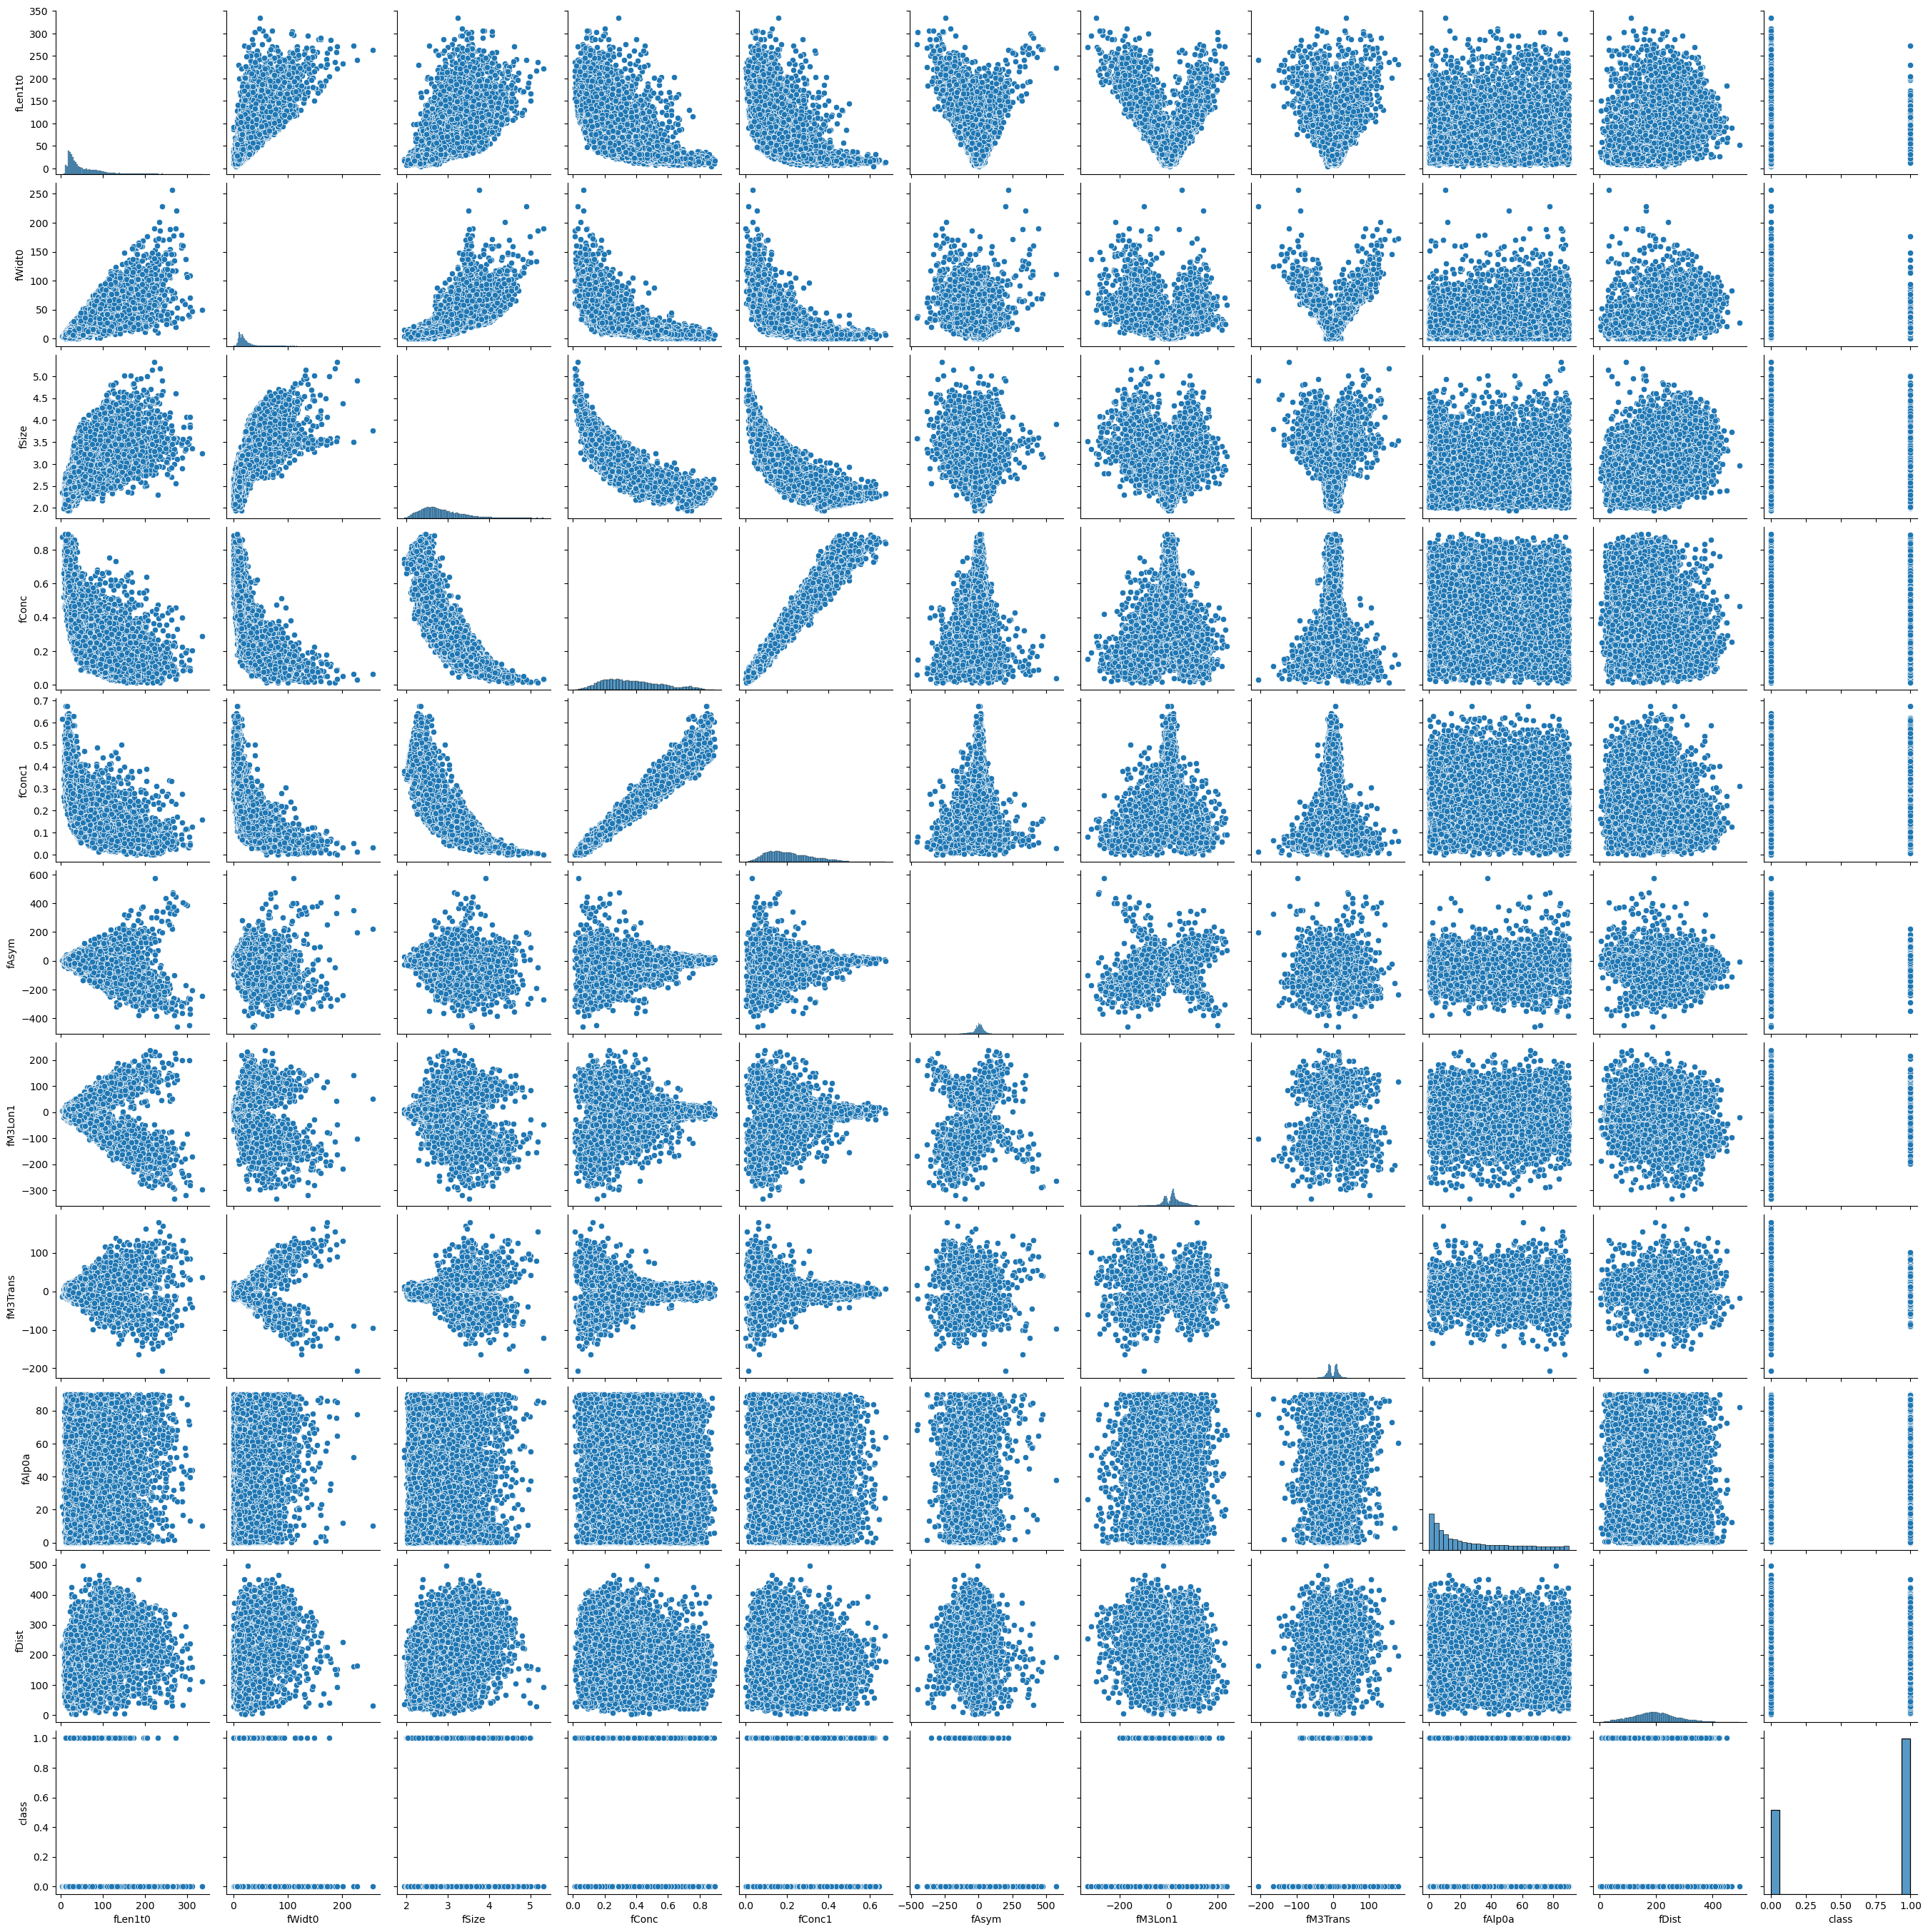

In [15]:
import seaborn as sns
sns.pairplot(data=df2)

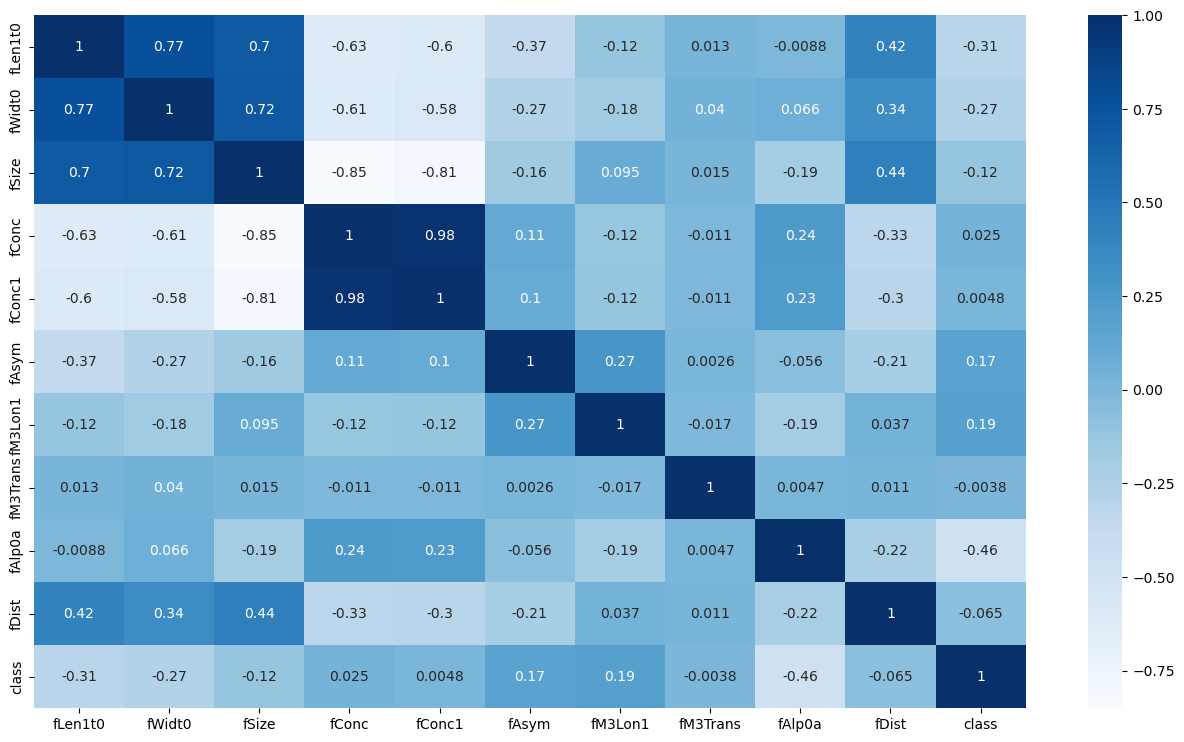

In [16]:
corr=df2.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

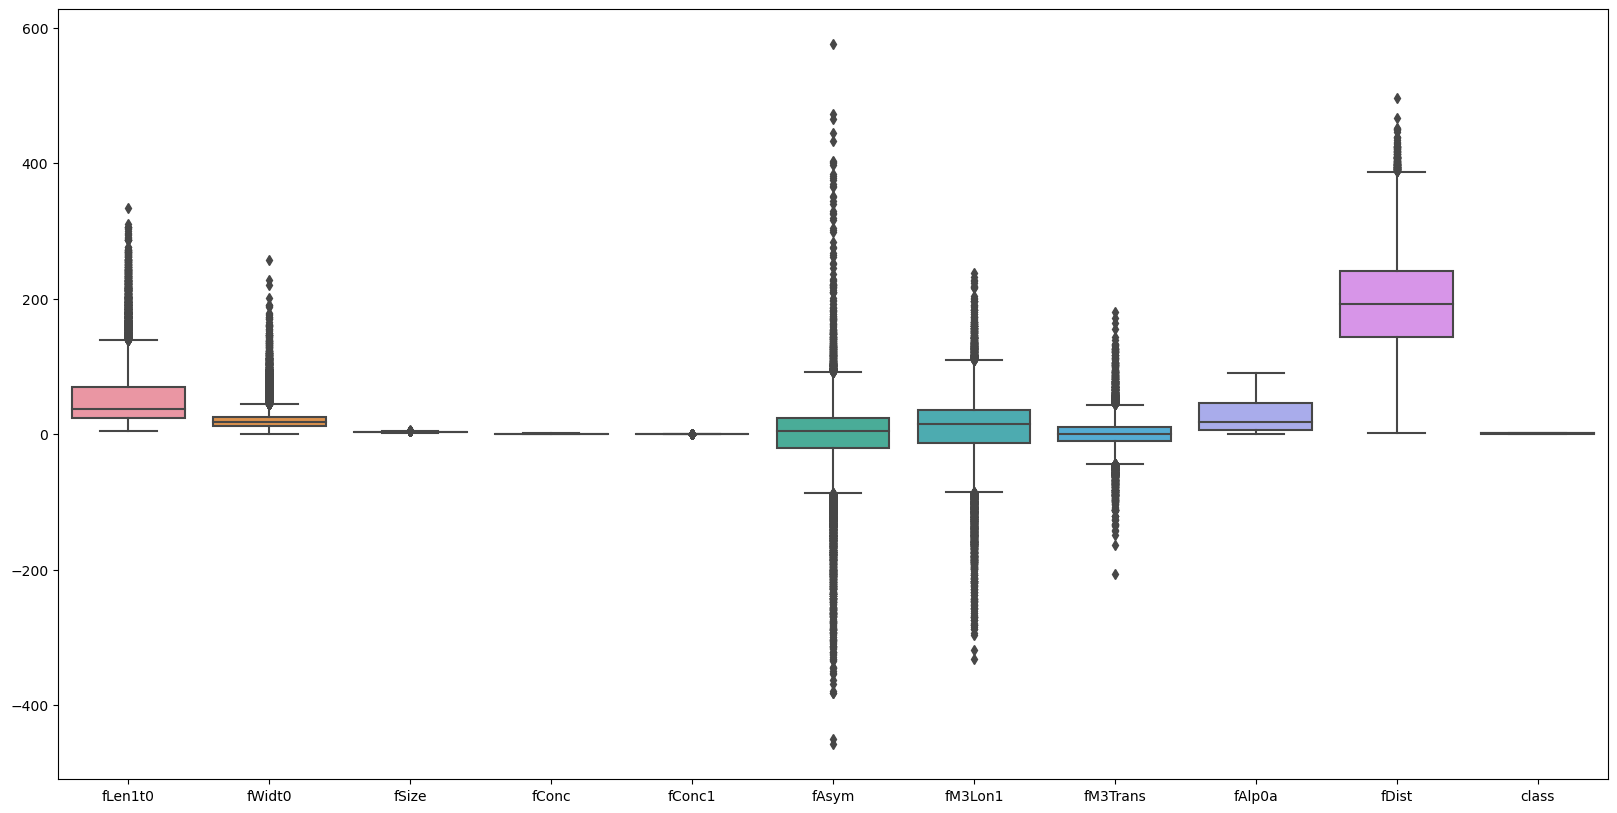

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2)
plt.show()

## Skewness

In [18]:
df2.skew().sort_values(ascending=False)

fWidt0      3.371628
fLen1t0     2.013652
fSize       0.875507
fAlp0a      0.850890
fConc1      0.685695
fConc       0.485888
fDist       0.229587
fM3Trans    0.120121
class      -0.621522
fAsym      -1.046441
fM3Lon1    -1.123078
dtype: float64

In [19]:
df3 = df2[['fWidt0','fLen1t0','class','fAsym','fM3Lon1']].apply(lambda x: np.log(x))
df3.skew().sort_values(ascending=False)

fLen1t0    0.422034
fWidt0          NaN
class           NaN
fAsym           NaN
fM3Lon1         NaN
dtype: float64

## Histogram

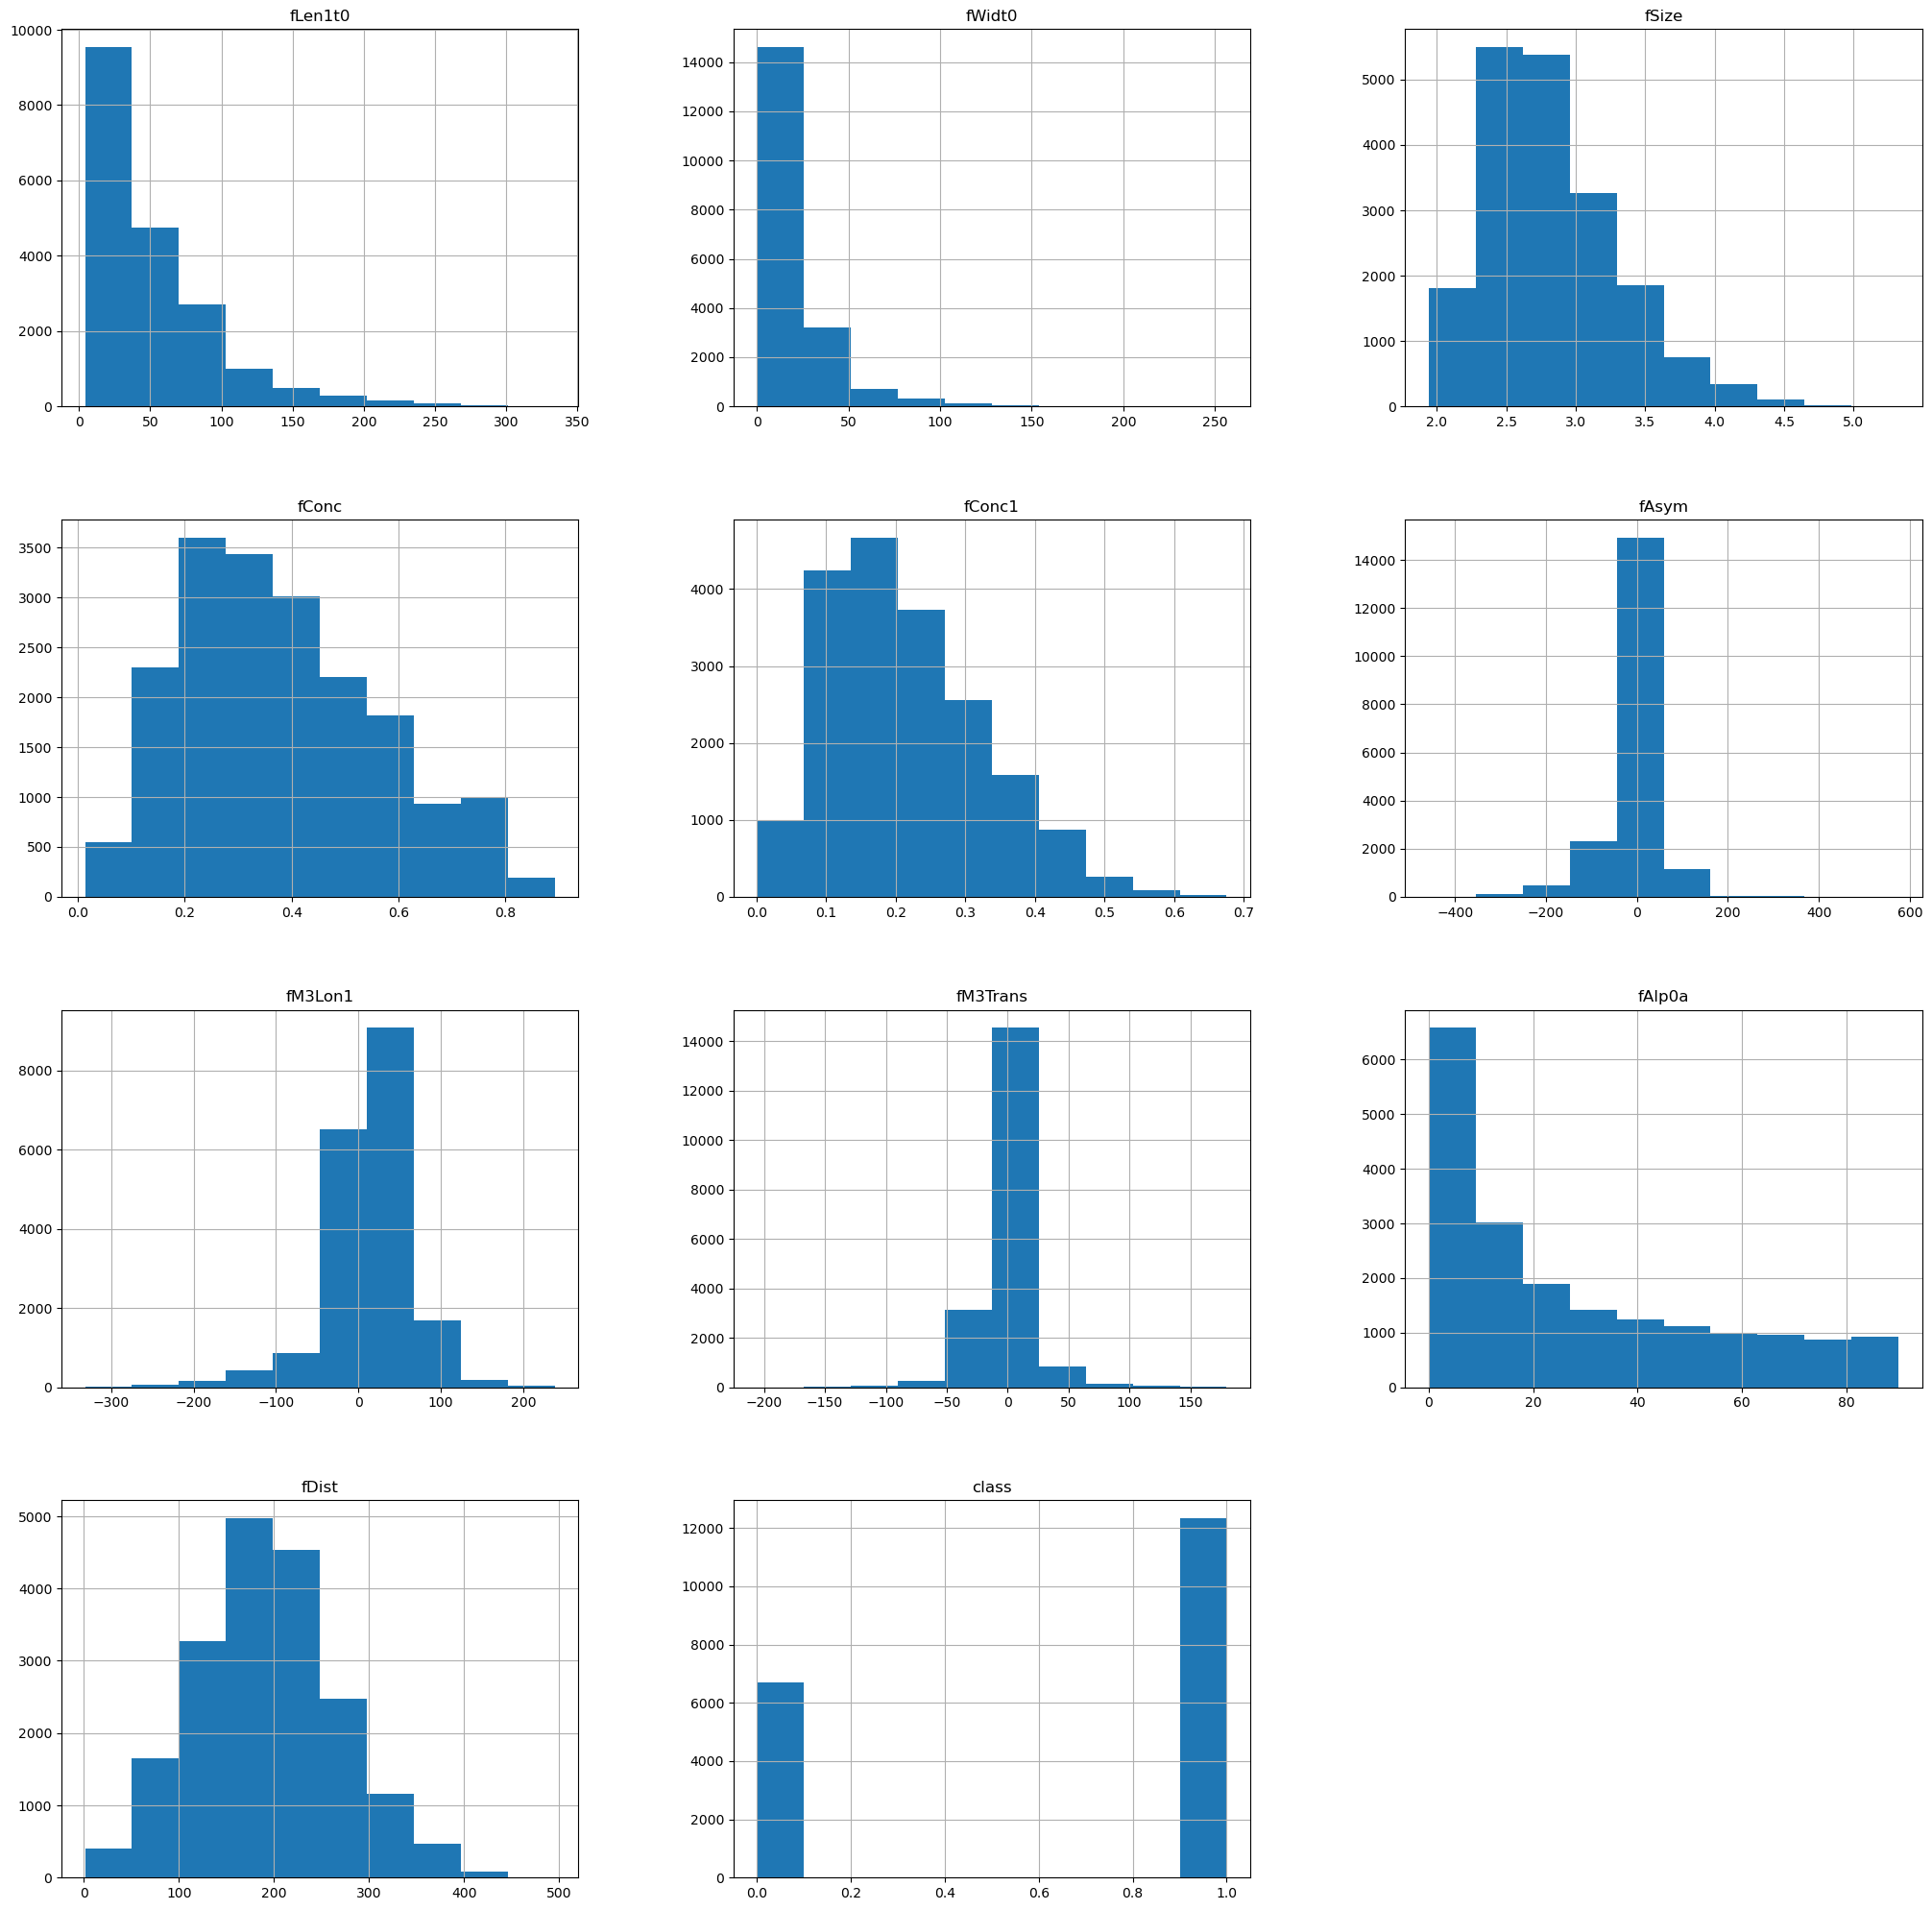

In [21]:
df2.hist(figsize=(25,25))
plt.show()

## Distribution Plot

<AxesSubplot:ylabel='Density'>

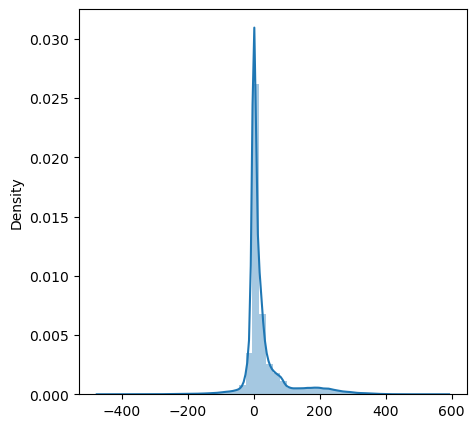

In [22]:
fig=plt.figure(figsize=(5,5))
sns.distplot(df2)

In [23]:
df2.dtypes

fLen1t0     float64
fWidt0      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Lon1     float64
fM3Trans    float64
fAlp0a      float64
fDist       float64
class         int64
dtype: object

# MODELS

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.58      0.71      1676
           1       0.81      0.96      0.88      3079

    accuracy                           0.83      4755
   macro avg       0.85      0.77      0.79      4755
weighted avg       0.84      0.83      0.82      4755



In [28]:
knn_prec=precision_score(y_test,y_pred)
knn_recall=recall_score(y_test,y_pred)
knn_f1=f1_score(y_test,y_pred)

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[ 976  700]
 [ 108 2971]]
Accuracy: 83.01%


In [30]:
lst=list()

In [31]:
for i in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    kn_pred=knn.predict(X_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

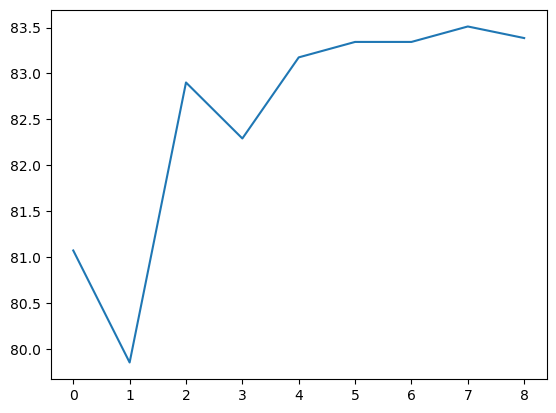

In [32]:
import matplotlib.pyplot as plt
plt.plot(lst)

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.70      0.37      0.48      1676
           1       0.73      0.92      0.81      3079

    accuracy                           0.72      4755
   macro avg       0.72      0.64      0.65      4755
weighted avg       0.72      0.72      0.69      4755



In [35]:
nb_prec=precision_score(y_test,nb_pred)
nb_recall=recall_score(y_test,nb_pred)
nb_f1=f1_score(y_test,nb_pred)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[ 976  700]
 [ 108 2971]]
Accuracy: 83.01%


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.66      1676
           1       0.80      0.90      0.85      3079

    accuracy                           0.79      4755
   macro avg       0.78      0.74      0.76      4755
weighted avg       0.79      0.79      0.78      4755



In [39]:
lg_prec=precision_score(y_test,lg_pred)
lg_recall=recall_score(y_test,lg_pred)
lg_f1=f1_score(y_test,lg_pred)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,lg_pred)
print(cm)
lg_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, lg_pred)*100))

[[ 985  691]
 [ 302 2777]]
Accuracy: 79.12%


# SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1676
           1       0.86      0.96      0.91      3079

    accuracy                           0.87      4755
   macro avg       0.88      0.83      0.85      4755
weighted avg       0.87      0.87      0.87      4755



In [43]:
svm_prec=precision_score(y_test,lg_pred)
svm_recall=recall_score(y_test,lg_pred)
svm_f1=f1_score(y_test,svm_pred)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_pred)
print(cm)
svm_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,svm_pred)*100))

[[1187  489]
 [ 128 2951]]
Accuracy: 87.02%


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
rf_pred = classifier.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1676
           1       0.88      0.95      0.92      3079

    accuracy                           0.89      4755
   macro avg       0.89      0.86      0.87      4755
weighted avg       0.89      0.89      0.88      4755



In [47]:
rf_prec=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rf_pred)
print(cm)
rf_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,rf_pred)*100))

[[1283  393]
 [ 150 2929]]
Accuracy: 88.58%


# AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)
adbo.fit(X_train,y_train)
ad_pred=adbo.predict(X_test)
print(classification_report(ad_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1681
           1       0.85      0.85      0.85      3074

    accuracy                           0.81      4755
   macro avg       0.79      0.79      0.79      4755
weighted avg       0.81      0.81      0.81      4755



In [51]:
ad_prec=precision_score(y_test,ad_pred)
ad_recall=recall_score(y_test,ad_pred)
ad_f1=f1_score(y_test,ad_pred)

In [52]:
ad_m=confusion_matrix(ad_pred,y_test)
print(ad_m)
ad_acc=ad_m.diagonal().sum()/ad_m.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,ad_pred)*100))

[[1228  453]
 [ 448 2626]]
Accuracy: 81.05%


# XG Boost

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1477
           1       0.94      0.88      0.91      3278

    accuracy                           0.88      4755
   macro avg       0.86      0.88      0.87      4755
weighted avg       0.89      0.88      0.88      4755



In [55]:
xgb_prec=precision_score(y_test,xgb_pred)
xgb_recall=recall_score(y_test,xgb_pred)
xgb_f1=f1_score(y_test,xgb_pred)

In [56]:
xgb_m=confusion_matrix(xgb_pred,y_test)
print(xgb_m)
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,xgb_pred)*100))

[[1292  185]
 [ 384 2894]]
Accuracy: 88.03%


## CONCLUSION

In [57]:
list1=["KNN","Naive Bayes","Logistic","SVM","Random Forest","ADABoost","XGBoost"]
list1a=[knn_acc,nb_acc,lg_acc,svm_acc,rf_acc,ad_acc,xgb_acc]
list1b=[knn_prec,nb_prec,lg_prec,svm_prec,rf_prec,ad_prec,xgb_prec]
list1c=[knn_recall,nb_recall,lg_recall,svm_recall,rf_recall,ad_recall,xgb_recall]
list1d=[knn_f1,nb_f1,lg_f1,svm_f1,rf_f1,ad_f1,xgb_f1]

In [58]:
table1=pd.DataFrame({"Model Name":list1,"Accuracy":list1a,"Precision":list1b,"Recall":list1c,"f1-Score":list1d})
table1

Model Name   Accuracy  Precision    Recall  f1-Score
0            KNN  83.007361   0.809316  0.964924  0.880296
1    Naive Bayes  83.007361   0.726384  0.916531  0.810454
2       Logistic  79.116719   0.800750  0.901916  0.848327
3            SVM  87.024185   0.800750  0.901916  0.905354
4  Random Forest  88.580442   0.881698  0.951283  0.915170
5       ADABoost  81.051525   0.854262  0.852874  0.853567
6        XGBoost  88.033649   0.882855  0.939916  0.910492

# Class Imbalance

# Random Undersampling

In [59]:
c_0,c_1=df2["class"].value_counts()
c_0,c_1

(12332, 6688)

In [60]:
train_0=df2[df2["class"]==1]
train_1=df2[df2["class"]==0]

In [61]:
train_0.shape,train_1.shape

((12332, 11), (6688, 11))

In [62]:
class_0under=train_0.sample(c_1)

In [63]:
class0_1=pd.concat([class_0under,train_1],axis=0)

In [64]:
class0_1["class"].value_counts()

1    6688
0    6688
Name: class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

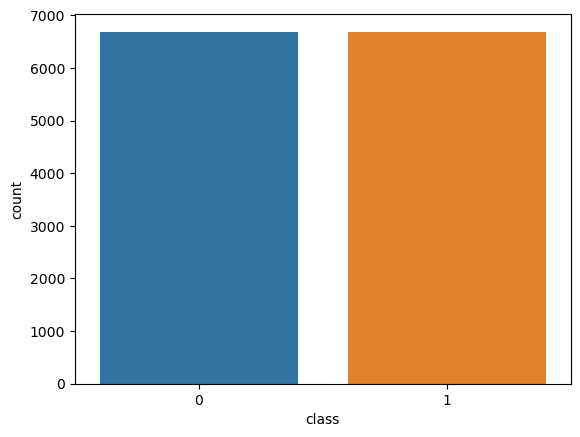

In [65]:
sns.countplot(class0_1["class"])
plt.show

## Skewness

In [67]:
class0_1.skew().sort_values(ascending=False)

fWidt0      2.984494
fLen1t0     1.836763
fSize       0.903195
fConc1      0.665372
fAlp0a      0.626360
fConc       0.450330
fDist       0.236148
fM3Trans    0.121950
class       0.000000
fAsym      -0.921831
fM3Lon1    -1.094918
dtype: float64

In [68]:
class0_1a=class0_1[['fWidt0','fLen1t0','fAsym','fM3Lon1']].apply(lambda x: np.log(x))
class0_1a.skew().sort_values(ascending=False)

fLen1t0    0.39329
fWidt0         NaN
fAsym          NaN
fM3Lon1        NaN
dtype: float64

In [69]:
class0_1a=class0_1[['fLen1t0']].apply(lambda x: np.log(x))
class0_1a.skew().sort_values(ascending=False)

fLen1t0    0.39329
dtype: float64

## Splitting into Training and Test data

In [70]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [71]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)

In [72]:
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((10700, 10), (2676, 10), (10700,), (2676,))

# CONCLUSION

In [97]:
list2=["KNN","Naive Bayes","Logistic","SVM","Random Forest","ADABoost","XGBoost"]
list2a=[u_knn_acc,u_nb_acc,u_lg_acc,u_svm_acc,u_rf_acc,u_ad_acc,u_xgb_acc]
list2b=[u_knn_prec,u_nb_prec,u_lg_prec,u_svm_prec,u_rf_prec,u_ad_prec,u_xgb_prec]
list2c=[u_knn_recall,u_nb_recall,u_lg_recall,u_svm_recall,u_rf_recall,u_ad_recall,u_xgb_recall]
list2d=[u_knn_f1,u_nb_f1,u_lg_f1,u_svm_f1,u_rf_f1,u_ad_f1,u_xgb_f1]

In [98]:
table2=pd.DataFrame({"Model Name":list2,"Accuracy":list2a,"Precision":list2b,"Recall":list2c,"f1-Score":list2d})
table2

Model Name   Accuracy  Precision    Recall  f1-Score
0            KNN  75.560538   0.712160  0.840458  0.771008
1    Naive Bayes  64.050822   0.586481  0.900763  0.710415
2       Logistic  77.466368   0.750532  0.808397  0.778390
3            SVM  79.745889   0.750980  0.877099  0.809155
4  Random Forest  85.687593   0.837582  0.877863  0.857249
5       ADABoost  80.194320   0.797710  0.797710  0.797710
6        XGBoost  85.762332   0.833932  0.885496  0.858941

## Outliers (BoxPlot)

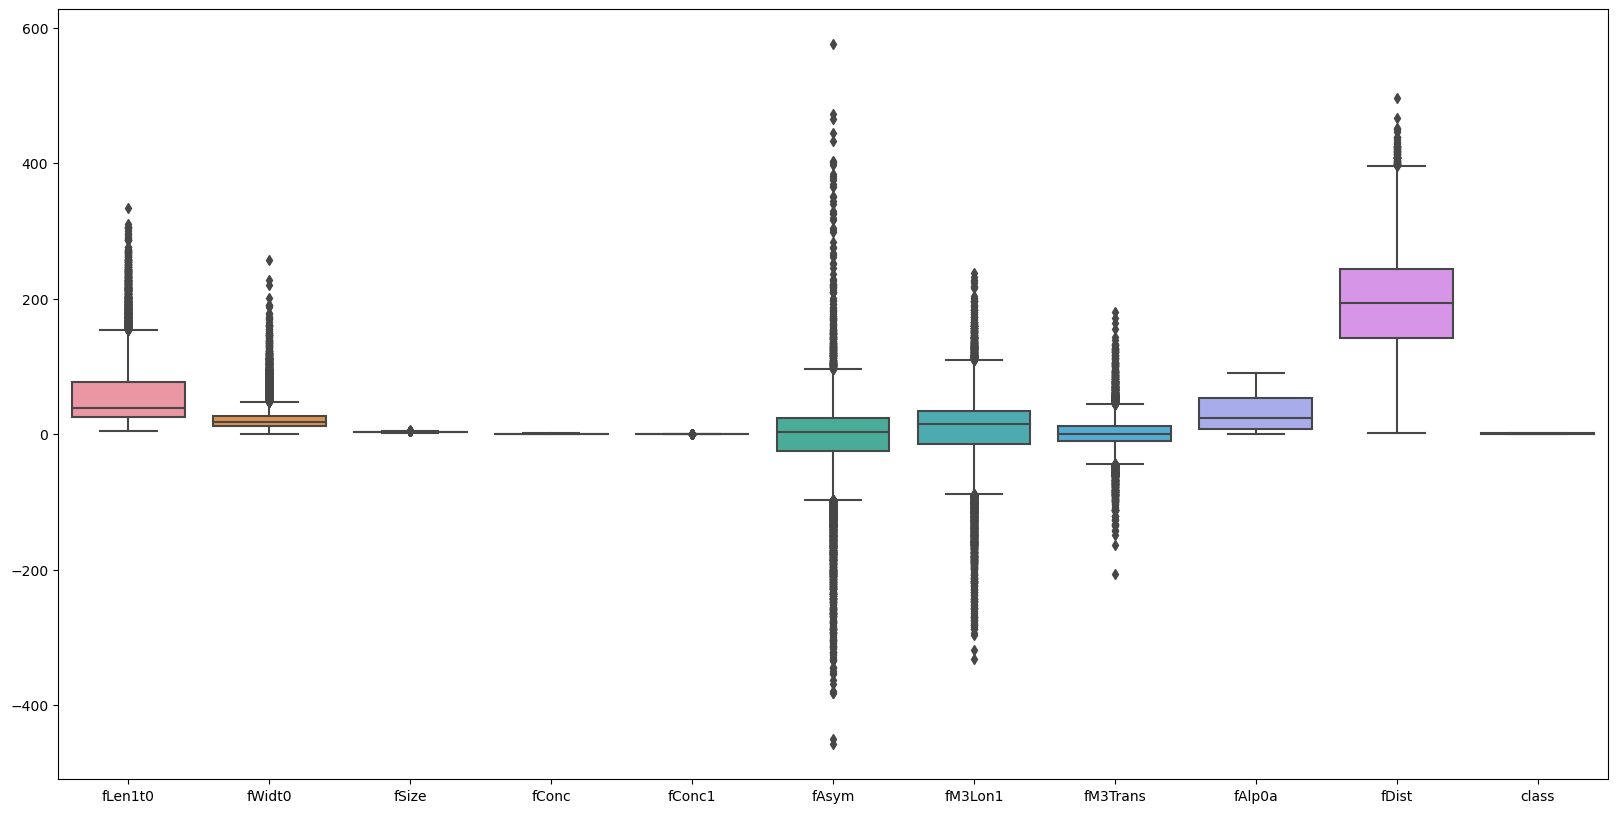

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(data=class0_1)
plt.show()

# RFE=Recursive FS

In [99]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [100]:
rfe=RFE(dTree)

In [101]:
rfe.fit(u_x_train,u_y_train)

RFE(estimator=DecisionTreeClassifier())

In [102]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False,  True,
        True])

In [103]:
df1=pd.DataFrame({"Score":list(rfe.support_),"columns":list(df2.iloc[:,0:10])})
df1

Score   columns
0   True   fLen1t0
1   True    fWidt0
2   True     fSize
3  False     fConc
4  False    fConc1
5  False     fAsym
6  False   fM3Lon1
7  False  fM3Trans
8   True    fAlp0a
9   True     fDist

In [140]:
df=df2.drop(["fConc1","fAsym","fM3Lon1","fM3Trans","fDist"],axis=1)
df

fLen1t0    fWidt0   fSize   fConc   fAlp0a  class
0       28.7967   16.0021  2.6449  0.3918  40.0920      1
1       31.6036   11.7235  2.5185  0.5303   6.3609      1
2      162.0520  136.0310  4.0612  0.0374  76.9600      1
3       23.8172    9.5728  2.3385  0.6147  10.4490      1
4       75.1362   30.9205  3.1611  0.3168   4.6480      1
...         ...       ...     ...     ...      ...    ...
19015   21.3846   10.9170  2.6161  0.5857   2.4229      0
19016   28.9452    6.7020  2.2672  0.5351  86.7975      0
19017   75.4455   47.5305  3.4483  0.1417  30.2987      0
19018  120.5135   76.9018  3.9939  0.0944  84.6874      0
19019  187.1814   53.0014  3.2093  0.2876  52.7310      0

[19020 rows x 6 columns]

In [105]:
Xe=df.iloc[:,0:-1]
Ye=df.iloc[:,-1]

In [141]:
# splitting data into train-test 
xe_train, xe_test, ye_train, ye_test = train_test_split( Xe, Ye, test_size = 0.3, random_state = 100)
xe_train.shape,xe_test.shape,ye_train.shape,ye_test.shape

((13314, 5), (5706, 5), (13314,), (5706,))

# KNN RFE

In [107]:
knn.fit(xe_train,ye_train)
ke_pred=knn.predict(xe_test)
k_cf1=confusion_matrix(ke_pred,ye_test)
print(classification_report(ke_pred,ye_test))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1603
           1       0.91      0.83      0.87      4103

    accuracy                           0.82      5706
   macro avg       0.78      0.82      0.79      5706
weighted avg       0.84      0.82      0.83      5706



In [109]:
ke_prec=precision_score(ye_test, ke_pred)
ke_recall=recall_score(ye_test, ke_pred)
ke_f1=f1_score(ye_test,ke_pred)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ye_test,ke_pred)
print(cm)
knne_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,ke_pred)*100))

[[1284  692]
 [ 319 3411]]
Accuracy: 82.28%


# Naive Bayes RFE

In [111]:
nb_model = GaussianNB()
nb_model = nb_model.fit(xe_train, ye_train)
nbe_pred = nb_model.predict(xe_test)
print(classification_report(ye_test,nbe_pred))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54      1976
           1       0.75      0.91      0.82      3730

    accuracy                           0.75      5706
   macro avg       0.74      0.67      0.68      5706
weighted avg       0.74      0.75      0.73      5706



In [112]:
nbe_prec=precision_score(ye_test, nbe_pred)
nbe_recall=recall_score(ye_test, nbe_pred)
nbe_f1=f1_score(ye_test,nbe_pred)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ye_test,nbe_pred)
print(cm)
nbe_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,nbe_pred)*100))

[[ 843 1133]
 [ 318 3412]]
Accuracy: 74.57%


# Logistic RFE

In [114]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(xe_train,ye_train)
lge_pred = lg_model.predict(xe_test)
print(classification_report(ye_test,lge_pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1976
           1       0.81      0.90      0.85      3730

    accuracy                           0.80      5706
   macro avg       0.79      0.75      0.76      5706
weighted avg       0.79      0.80      0.79      5706



In [116]:
lge_prec=precision_score(ye_test, lge_pred)
lge_recall=recall_score(ye_test, lge_pred)
lge_f1=f1_score(ye_test,lge_pred)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ye_test,lge_pred)
print(cm)
lge_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test, lge_pred)*100))

[[1179  797]
 [ 363 3367]]
Accuracy: 79.67%


# SVM RFE

In [118]:
svm_model = SVC()
svm_model = svm_model.fit(xe_train,ye_train)
svme_pred = svm_model.predict(xe_test)
print(classification_report(ye_test, svme_pred))

              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1976
           1       0.81      0.96      0.88      3730

    accuracy                           0.83      5706
   macro avg       0.84      0.77      0.79      5706
weighted avg       0.83      0.83      0.82      5706



In [120]:
svme_prec=precision_score(ye_test, svme_pred)
svme_recall=recall_score(ye_test, svme_pred)
svme_f1=f1_score(ye_test,svme_pred)

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ye_test,svme_pred)
print(cm)
svme_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,svme_pred)*100))

[[1148  828]
 [ 165 3565]]
Accuracy: 82.60%


# Random Forest RFE

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(criterion = 'entropy', random_state = 0)

In [123]:
rf.fit(xe_train,ye_train)
rfe_pred=rf.predict(xe_test)
print(classification_report(rfe_pred,ye_test))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1719
           1       0.94      0.88      0.91      3987

    accuracy                           0.88      5706
   macro avg       0.85      0.87      0.86      5706
weighted avg       0.88      0.88      0.88      5706



In [124]:
rfe_prec=precision_score(ye_test, rfe_pred)
rfe_recall=recall_score(ye_test, rfe_pred)
rfe_f1=f1_score(ye_test,rfe_pred)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ye_test,rfe_pred)
print(cm)
rfe_acc=cm.diagonal().sum()/cm.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,rfe_pred)*100))

[[1492  484]
 [ 227 3503]]
Accuracy: 87.54%


# AdaBoost RFE

In [126]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)
adbo.fit(xe_train,ye_train)
ade_pred=adbo.predict(xe_test)
print(classification_report(ade_pred,ye_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1985
           1       0.86      0.86      0.86      3721

    accuracy                           0.81      5706
   macro avg       0.79      0.79      0.79      5706
weighted avg       0.81      0.81      0.81      5706



In [127]:
ade_prec=precision_score(ye_test, ade_pred)
ade_recall=recall_score(ye_test, ade_pred)
ade_f1=f1_score(ye_test,ade_pred)

In [128]:
ad_m=confusion_matrix(ade_pred,ye_test)
print(ad_m)
ade_acc=ad_m.diagonal().sum()/ad_m.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,ade_pred)*100))

[[1446  539]
 [ 530 3191]]
Accuracy: 81.27%


# XGBoost RFE

In [130]:
xgb=XGBClassifier()
xgb.fit(xe_train,ye_train)
xgbe_pred=xgb.predict(xe_test)
print(classification_report(xgbe_pred,ye_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1751
           1       0.93      0.88      0.90      3955

    accuracy                           0.87      5706
   macro avg       0.84      0.87      0.85      5706
weighted avg       0.88      0.87      0.87      5706



In [131]:
xgbe_prec=precision_score(ye_test, xgbe_pred)
xgbe_recall=recall_score(ye_test, xgbe_pred)
xgbe_f1=f1_score(ye_test,xgbe_pred)

In [132]:
xgb_m=confusion_matrix(xgbe_pred,ye_test)
print(xgb_m)
xgbe_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
print("Accuracy: {:.2f}%".format(accuracy_score(ye_test,xgbe_pred)*100))

[[1493  258]
 [ 483 3472]]
Accuracy: 87.01%


# CONCLUSIONS

In [134]:
list3=["KNN","Naive Bayes","Logistic","SVM","Random Forest","ADABoost","XGBoost"]
list3a=[knne_acc,nbe_acc,lge_acc,svme_acc,rfe_acc,ade_acc,xgbe_acc]
list3b=[ke_prec,nbe_prec,lge_prec,svme_prec,rfe_prec,ade_prec,xgbe_prec]
list3c=[ke_recall,nbe_recall,lge_recall,svme_recall,rfe_recall,ade_recall,xgbe_recall]
list3d=[ke_f1,nbe_f1,lge_f1,svme_f1,rfe_f1,ade_f1,xgbe_f1]

In [135]:
table3=pd.DataFrame({"Model Name":list3,"Accuracy":list3a,"Precision":list3b,"Recall":list3c,"f1-Score":list3d})
table3

Model Name   Accuracy  Precision    Recall  f1-Score
0            KNN  82.281809   0.831343  0.914477  0.870931
1    Naive Bayes  74.570627   0.750715  0.914745  0.824653
2       Logistic  79.670522   0.808598  0.902681  0.853053
3            SVM  82.597266   0.811518  0.955764  0.877755
4  Random Forest  87.539432   0.878605  0.939142  0.907866
5       ADABoost  81.265335   0.857565  0.855496  0.856529
6        XGBoost  87.013670   0.877876  0.930831  0.903578

# FINAL CONCLUSIONS

In [136]:
lista=["KNN","Naive Bayes","Logistic","SVM","Random Forest","ADABoost","XGBoost"]
listb=[knn_acc,nb_acc,lg_acc,svm_acc,rf_acc,ad_acc,xgb_acc]
listc=[u_knn_acc,u_nb_acc,u_lg_acc,u_svm_acc,u_rf_acc,u_ad_acc,u_xgb_acc]
listd=[knne_acc,nbe_acc,lge_acc,svme_acc,rfe_acc,ade_acc,xgbe_acc]

In [137]:
acc=pd.DataFrame({"Model Name":lista,"Accuracy":listb,"Accuracy with Undersampling":listc,"Accuracy with RFE":listd})
acc

Model Name   Accuracy  Accuracy with Undersampling  Accuracy with RFE
0            KNN  83.007361                    75.560538          82.281809
1    Naive Bayes  83.007361                    64.050822          74.570627
2       Logistic  79.116719                    77.466368          79.670522
3            SVM  87.024185                    79.745889          82.597266
4  Random Forest  88.580442                    85.687593          87.539432
5       ADABoost  81.051525                    80.194320          81.265335
6        XGBoost  88.033649                    85.762332          87.013670

# PRECISION RECALL CURVE

In [144]:
rfe_prob=rf.predict_proba(xe_test)
rfe_prob

array([[0.28, 0.72],
       [0.18, 0.82],
       [0.05, 0.95],
       ...,
       [0.98, 0.02],
       [0.18, 0.82],
       [1.  , 0.  ]])

In [145]:
df=pd.DataFrame(rfe_prob)
df

0     1
0     0.28  0.72
1     0.18  0.82
2     0.05  0.95
3     0.03  0.97
4     0.00  1.00
...    ...   ...
5701  0.83  0.17
5702  0.02  0.98
5703  0.98  0.02
5704  0.18  0.82
5705  1.00  0.00

[5706 rows x 2 columns]

In [138]:
#PRC Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [146]:
precision,recall,threshold=precision_recall_curve(ye_test,df.iloc[:,1])

Text(0.5, 1.0, 'precision - recall')

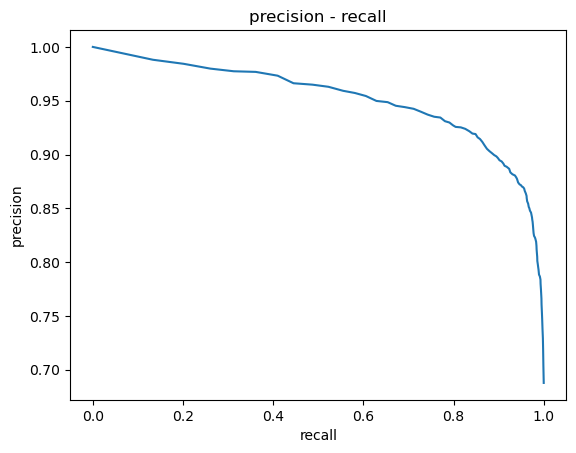

In [147]:
plt.plot(recall,precision,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision")
#plt.legend(lot="upper left")
plt.title("precision - recall")